In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('data.csv')
df.dtypes

: 

In [2]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Gender'] = df['Gender'].astype('category')
df['Personalized_Recommendation_Purchase'] = df['Personalized_Recommendation_Purchase'].astype('category')
df['Review_Left'] = df['Review_Left'].astype('category')
df['Review_Helpfulness'] = df['Review_Helpfulness'].astype('category')
df['Review_Reliability'] = df['Review_Reliability'].astype('category')
df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].astype('category')
df['Add_to_Cart_Browsing'] = df['Add_to_Cart_Browsing'].astype('category')
df['Cart_Completion_Frequency'] = df['Cart_Completion_Frequency'].astype('category')
df['Purchase_Categories'] = df['Purchase_Categories'].astype('category')
df['Purchase_Frequency'] = df['Purchase_Frequency'].astype('category')
df['Browsing_Frequency'] = df['Browsing_Frequency'].astype('category')
df['Product_Search_Method'] = df['Product_Search_Method'].astype('category')
df['Search_Result_Exploration'] = df['Search_Result_Exploration'].astype('category')
df['Saveforlater_Frequency'] = df['Saveforlater_Frequency'].astype('category')

/var/folders/4f/3q1szy9x24sd8n7f5l6xxwp80000gn/T/ipykernel_26155/3258632168.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
display(missing_report[missing_report['Missing Values'] > 0])
df = df.copy()

# 1. Handle missing values in Product_Search_Method
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Product_Search_Method'] = df['Product_Search_Method'].fillna(df['Product_Search_Method'].mode()[0])


,Missing Values,Percentage (%)
age_group,5,1.207729


In [ ]:
custom_missing = ["Nothing", ".", "Nil"]
df.replace(custom_missing, pd.NA, inplace=True)

In [5]:
print(df.describe())

for col in df.select_dtypes(['category']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

Yulduz Contribution


Outliers in age:
Number of outliers: 20
Percentage of outliers: 3.32%
Boundary range: 3.50 to 55.50
Outlier values: [np.int64(3), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(57), np.int64(57), np.int64(58), np.int64(60), np.int64(60), np.int64(60), np.int64(62), np.int64(63), np.int64(64), np.int64(67), np.int64(67)]


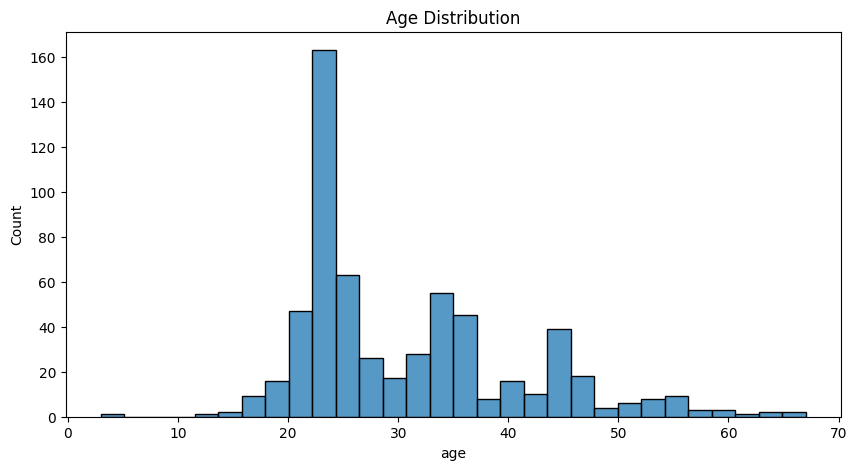


Age group distribution:
age_group
Under 18     20
18-30       325
31-50       228
51-70        29
Over 70       0
Name: count, dtype: int64

Suspicious ages (under 16):
age
3     1
12    1
15    2
Name: count, dtype: int64


In [6]:
#Yulduz Muradova
#age numerical data 
numerical_cols = ['age']

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

#  detailed outlier information
for column in numerical_cols:
    outliers, lower, upper = detect_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")
    print(f"Boundary range: {lower:.2f} to {upper:.2f}")
    if len(outliers) > 0:
        print("Outlier values:", sorted(outliers.values))

# Additional visualization for age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')
plt.show()

# Age groups analysis
age_bins = [0, 18, 30, 50, 70, 100]
age_labels = ['Under 18', '18-30', '31-50', '51-70', 'Over 70']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
print("\nAge group distribution:")
print(df['age_group'].value_counts().sort_index())

# Suspicious ages analysis
suspicious_ages = df[df['age'] < 16]
print("\nSuspicious ages (under 16):")
if len(suspicious_ages) > 0:
    print(suspicious_ages['age'].value_counts().sort_index())
else:
    print("No suspicious ages found under 16")

Cleaned outliers for age 

In [7]:
#Yulduz Muradova
df_cleaned = df.copy()

# Remove suspicious ages (under 16)
df_cleaned = df_cleaned[df_cleaned['age'] >= 16]

# Verify the cleaning
print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(df_cleaned))
print("Number of records removed:", len(df) - len(df_cleaned))

print("\nNew age statistics:")
print(df_cleaned['age'].describe())

# New age group distribution with corrected labels
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], 
                                bins=[16, 18, 30, 50, 70, 100],
                                labels=['16-18', '18-30', '31-50', '51-70', 'Over 70'])
print("\nNew age group distribution:")
print(df_cleaned['age_group'].value_counts().sort_index())

# Check for outliers in the cleaned dataset
outliers, lower, upper = detect_outliers(df_cleaned, 'age')
print("\nOutliers in cleaned age data:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df_cleaned) * 100):.2f}%")
print(f"Boundary range: {lower:.2f} to {upper:.2f}")
if len(outliers) > 0:
    print("Outlier values:", sorted(outliers.values))
df = df_cleaned.copy()

Original dataset size: 602
Cleaned dataset size: 598
Number of records removed: 4

New age statistics:
count    598.000000
mean      30.921405
std       10.092645
min       16.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64

New age group distribution:
age_group
16-18       11
18-30      325
31-50      228
51-70       29
Over 70      0
Name: count, dtype: int64

Outliers in cleaned age data:
Number of outliers: 19
Percentage of outliers: 3.18%
Boundary range: 3.50 to 55.50
Outlier values: [np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(56), np.int64(57), np.int64(57), np.int64(58), np.int64(60), np.int64(60), np.int64(60), np.int64(62), np.int64(63), np.int64(64), np.int64(67), np.int64(67)]


In [ ]:
#Yulduz Muradova
# copy of the cleaned dataframe
df_no_outliers = df_cleaned.copy()
df_final = df_no_outliers.copy()
df_final = df_final[
    (df_final['age'] >= 5.00) & 
    (df_final['age'] <= 53.00)
]

# final final cleaning
print("Dataset size before removing final outliers:", len(df_no_outliers))
print("Final dataset size:", len(df_final))
print("Number of final outliers removed:", len(df_no_outliers) - len(df_final))

# Check the final age statistics
print("\nFinal age statistics after removing all outliers:")
print(df_final['age'].describe())

# Check the final age group distribution
df_final['age_group'] = pd.cut(df_final['age'],
                              bins=[16, 18, 30, 50, 70, 100],
                              labels=['16-18', '18-30', '31-50', '51-70', 'Over 70'])
print("\nFinal age group distribution:")
print(df_final['age_group'].value_counts().sort_index())

# Final verification for outliers
outliers, lower, upper = detect_outliers(df_final, 'age')
print("\nFinal verification - outliers check:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df_final) * 100):.2f}%")
print(f"Boundary range: {lower:.2f} to {upper:.2f}")

# Save the final cleaned dataset
df = df_final.copy()
# List all column names in the dataset

# Save the cleaned dataframe to CSV
df_final.to_csv('cleaned_amazon_data.csv', index=False)


Dataset size before removing final outliers: 598
Final dataset size: 572
Number of final outliers removed: 26

Final age statistics after removing all outliers:
count    572.000000
mean      29.701049
std        8.456117
min       16.000000
25%       23.000000
50%       26.000000
75%       35.000000
max       53.000000
Name: age, dtype: float64

Final age group distribution:
age_group
16-18       11
18-30      325
31-50      228
51-70        3
Over 70      0
Name: count, dtype: int64

Final verification - outliers check:
Number of outliers: 0
Percentage of outliers: 0.00%
Boundary range: 5.00 to 53.00


In [9]:
# List all column names in the dataset
print(df_cleaned.columns)


Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Purchase',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'age_group'],
      dtype='object')
